# Part One: Understanding the Background and Data

https://fivethirtyeight.com/features/fandango-movies-ratings/

# The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

# IMPORTED LIBRARIES

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part Two: Exploring Fandango Displayed Scores versus True User Ratings

In [47]:
fandango1 = pd.read_csv("fandango_scrape.csv")
fandango = fandango1.copy(deep=True)

fandango.head()

FILM  STARS  RATING  VOTES
0  Fifty Shades of Grey (2015)    4.0     3.9  34846
1        Jurassic World (2015)    4.5     4.5  34390
2       American Sniper (2015)    5.0     4.8  34085
3             Furious 7 (2015)    5.0     4.8  33538
4            Inside Out (2015)    4.5     4.5  15749

In [8]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [9]:
fandango.describe()

STARS      RATING         VOTES
count  504.000000  504.000000    504.000000
mean     3.558532    3.375794   1147.863095
std      1.563133    1.491223   3830.583136
min      0.000000    0.000000      0.000000
25%      3.500000    3.100000      3.000000
50%      4.000000    3.800000     18.500000
75%      4.500000    4.300000    189.750000
max      5.000000    5.000000  34846.000000

### The relationship between popularity of a film and its rating.

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

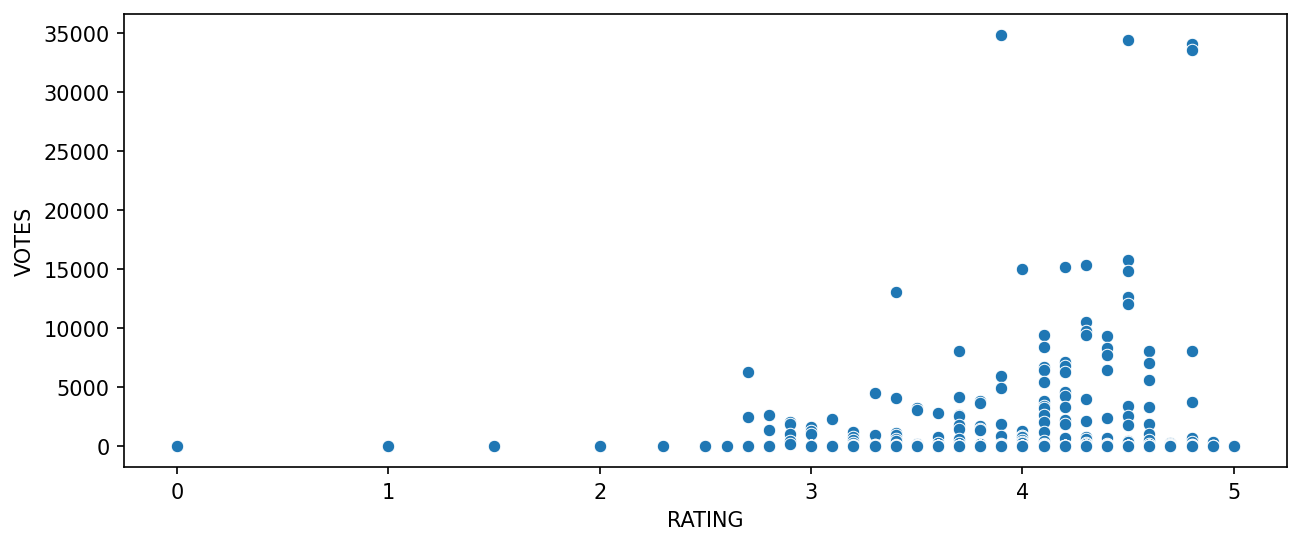

In [10]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=fandango,x="RATING",y="VOTES")

### The correlation between the columns :

In [12]:
fandango.corr()

STARS    RATING     VOTES
STARS   1.000000  0.994696  0.164218
RATING  0.994696  1.000000  0.163764
VOTES   0.164218  0.163764  1.000000

### Creating the YEAR column :

In [13]:
# Creating year column
fandango["YEAR"] = fandango1["FILM"].str.strip().str[-5:-1]
# Modifiying film column by removing the year from the film title
fandango["FILM"] = fandango1["FILM"].str.strip().str[:-6]

fandango.head()

FILM  STARS  RATING  VOTES  YEAR
0  Fifty Shades of Grey     4.0     3.9  34846  2015
1        Jurassic World     4.5     4.5  34390  2015
2       American Sniper     5.0     4.8  34085  2015
3             Furious 7     5.0     4.8  33538  2015
4            Inside Out     4.5     4.5  15749  2015

### Fandango count of movies per year

<AxesSubplot:xlabel='YEAR', ylabel='count'>

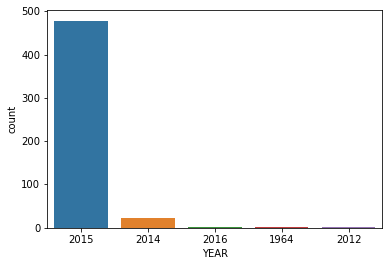

In [14]:
sns.countplot(data=fandango,x="YEAR")

### The 10 movies with the highest number of votes

In [15]:
fandango.nlargest(10,"VOTES")

FILM  STARS  RATING  VOTES  YEAR
0                       Fifty Shades of Grey     4.0     3.9  34846  2015
1                             Jurassic World     4.5     4.5  34390  2015
2                            American Sniper     5.0     4.8  34085  2015
3                                  Furious 7     5.0     4.8  33538  2015
4                                 Inside Out     4.5     4.5  15749  2015
5  The Hobbit: The Battle of the Five Armies     4.5     4.3  15337  2014
6               Kingsman: The Secret Service     4.5     4.2  15205  2015
7                                    Minions     4.0     4.0  14998  2015
8                    Avengers: Age of Ultron     5.0     4.5  14846  2015
9                             Into the Woods     3.5     3.4  13055  2014

### Removing movies with zero votes

In [16]:
REV_FILMS = fandango[fandango["VOTES"] > 0]
REV_FILMS

FILM  STARS  RATING  VOTES  YEAR
0    Fifty Shades of Grey     4.0     3.9  34846  2015
1          Jurassic World     4.5     4.5  34390  2015
2         American Sniper     5.0     4.8  34085  2015
3               Furious 7     5.0     4.8  33538  2015
4              Inside Out     4.5     4.5  15749  2015
..                     ...    ...     ...    ...   ...
430       That Sugar Film     5.0     5.0      1  2015
431            The Intern     5.0     5.0      1  2015
432        The Park Bench     5.0     5.0      1  2015
433         The Wanted 18     5.0     5.0      1  2015
434       Z For Zachariah     5.0     5.0      1  2015

[435 rows x 5 columns]

### Creating a kdeplot showing the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING).

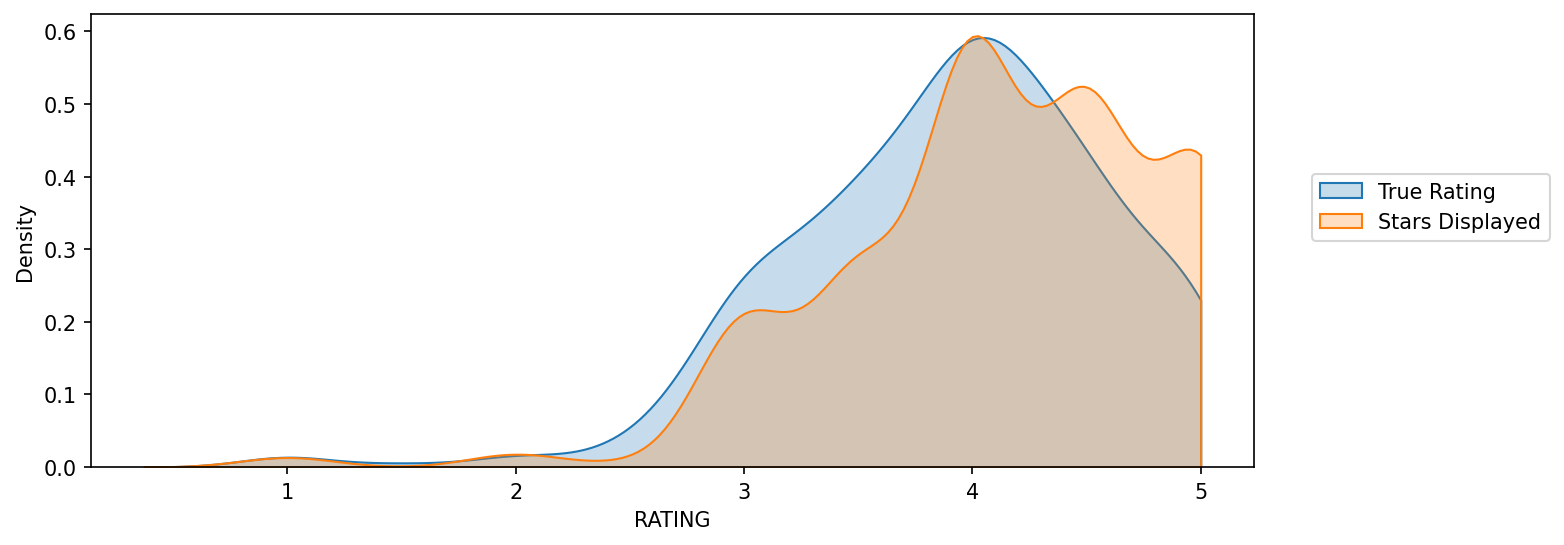

In [17]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=REV_FILMS,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=REV_FILMS,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')

plt.legend(loc=(1.05,0.5))

### Creating a new column of the difference between STARS displayed versus true RATING

In [18]:
REV_FILMS["STARS_DIFF"] = round(REV_FILMS["STARS"] - REV_FILMS["RATING"],1)
REV_FILMS

<ipython-input-18-2c83830233b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  REV_FILMS["STARS_DIFF"] = round(REV_FILMS["STARS"] - REV_FILMS["RATING"],1)


FILM  STARS  RATING  VOTES  YEAR  STARS_DIFF
0    Fifty Shades of Grey     4.0     3.9  34846  2015         0.1
1          Jurassic World     4.5     4.5  34390  2015         0.0
2         American Sniper     5.0     4.8  34085  2015         0.2
3               Furious 7     5.0     4.8  33538  2015         0.2
4              Inside Out     4.5     4.5  15749  2015         0.0
..                     ...    ...     ...    ...   ...         ...
430       That Sugar Film     5.0     5.0      1  2015         0.0
431            The Intern     5.0     5.0      1  2015         0.0
432        The Park Bench     5.0     5.0      1  2015         0.0
433         The Wanted 18     5.0     5.0      1  2015         0.0
434       Z For Zachariah     5.0     5.0      1  2015         0.0

[435 rows x 6 columns]

### A count plot displaying the number of times a certain difference occurs

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

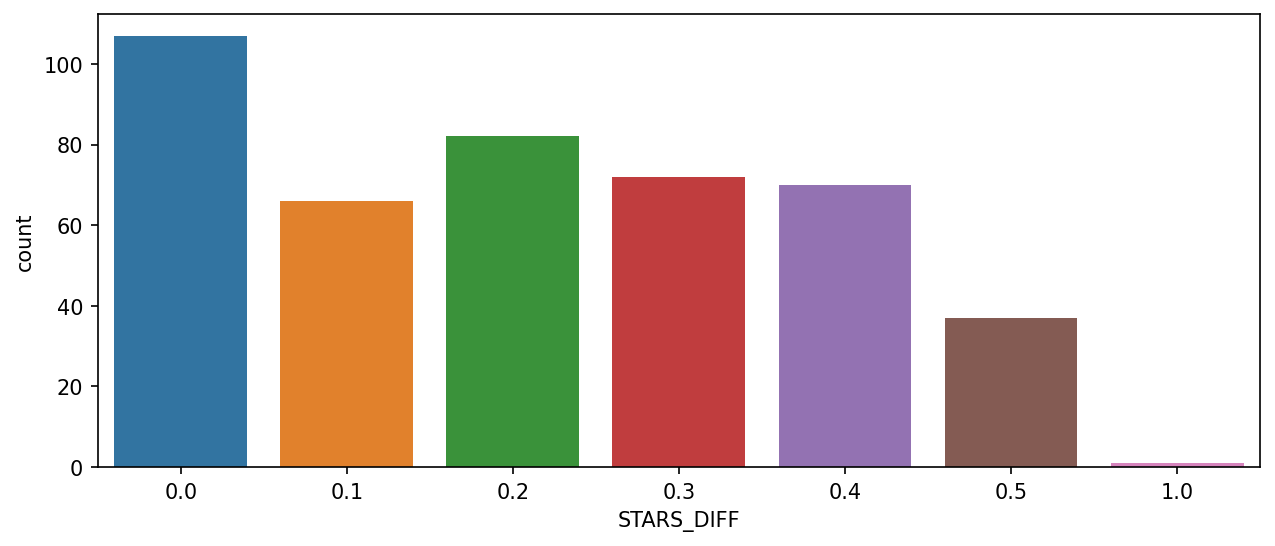

In [19]:
plt.figure(figsize=(10,4),dpi=150)
sns.countplot(data=REV_FILMS,x="STARS_DIFF")

# Part Three: Comparison of Fandango Ratings to Other Sites

Let's now compare the scores from Fandango to other movies sites and see how they compare.

In [20]:
all_sites = pd.read_csv("all_sites_scores.csv")
all_sites.head()

FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Metacritic_user_vote_count  \
0          66              7.1   7.8                        1330   
1          67              7.5   7.1                         249   
2          64              8.1   7.8                         627   
3          22              4.7   5.4                          31   
4          29              3.4   5.1                          88   

   IMDB_user_vote_count  
0                271107  
1                 65709  
2                103660  
3                  3136  
4                 19560

In [21]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [22]:
all_sites.describe()

RottenTomatoes  RottenTomatoes_User  Metacritic  Metacritic_User  \
count      146.000000           146.000000  146.000000       146.000000   
mean        60.849315            63.876712   58.808219         6.519178   
std         30.168799            20.024430   19.517389         1.510712   
min          5.000000            20.000000   13.000000         2.400000   
25%         31.250000            50.000000   43.500000         5.700000   
50%         63.500000            66.500000   59.000000         6.850000   
75%         89.000000            81.000000   75.000000         7.500000   
max        100.000000            94.000000   94.000000         9.600000   

             IMDB  Metacritic_user_vote_count  IMDB_user_vote_count  
count  146.000000                  146.000000            146.000000  
mean     6.736986                  185.705479          42846.205479  
std      0.958736                  316.606515          67406.509171  
min      4.000000                    4.000000            243.000000  
25%      6.300000                   33.250000           5627.000000  
50%      6.900000                   72.500000          19103.000000  
75%      7.400000                  168.500000          45185.750000  
max      8.600000                 2375.000000         334164.000000

### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews.

(0.0, 100.0)

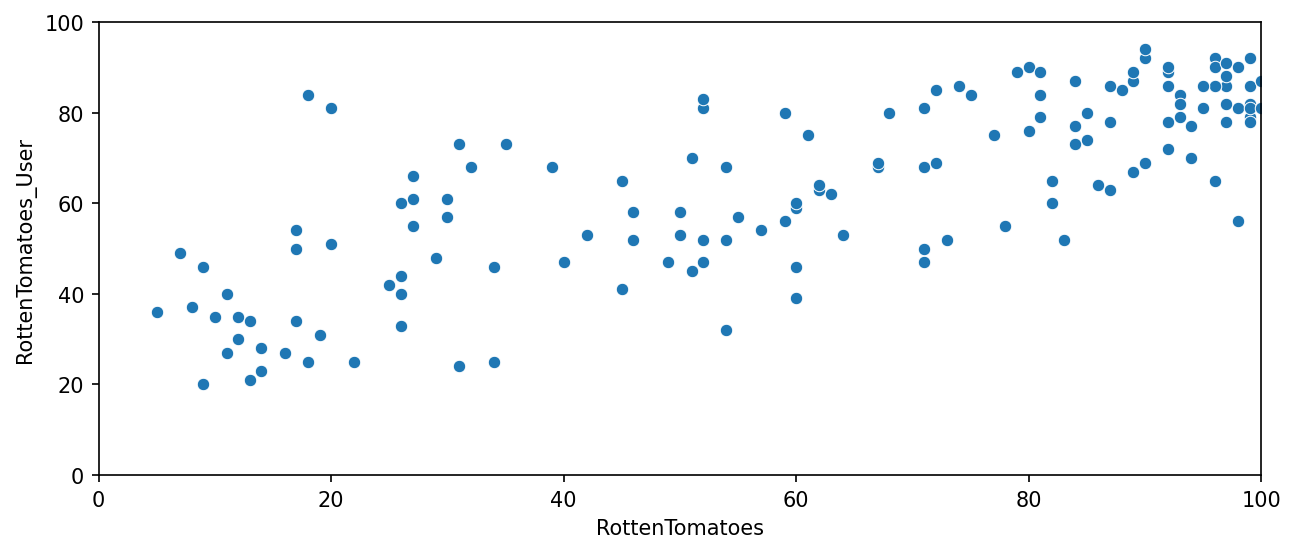

In [23]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x="RottenTomatoes",y="RottenTomatoes_User")
plt.xlim(0,100)
plt.ylim(0,100)

### Let's quantify this difference by comparing the critics ratings and the RT User ratings. 
We will calculate this with RottenTomatoes - RottenTomatoes_User.

In [30]:
def difference(dif):
    if dif < 0.0:
        return "Liked by Users" 
    elif dif == 0.0:
        return "Both Agree"
    else:
        return "Liked by Critics"
all_sites["Rotten_Diff"] = np.round(all_sites["RottenTomatoes"] - all_sites["RottenTomatoes_User"],2)
all_sites["Liked by"] = all_sites["Rotten_Diff"].apply(difference)
all_sites[["FILM","RottenTomatoes","RottenTomatoes_User","Rotten_Diff","Liked by"]]

FILM  RottenTomatoes  \
0               Avengers: Age of Ultron (2015)              74   
1                            Cinderella (2015)              85   
2                               Ant-Man (2015)              80   
3                       Do You Believe? (2015)              18   
4                Hot Tub Time Machine 2 (2015)              14   
..                                         ...             ...   
141                          Mr. Holmes (2015)              87   
142                                 '71 (2015)              97   
143                 Two Days, One Night (2014)              97   
144  Gett: The Trial of Viviane Amsalem (2015)             100   
145         Kumiko, The Treasure Hunter (2015)              87   

     RottenTomatoes_User  Rotten_Diff          Liked by  
0                     86          -12    Liked by Users  
1                     80            5  Liked by Critics  
2                     90          -10    Liked by Users  
3                     84          -66    Liked by Users  
4                     28          -14    Liked by Users  
..                   ...          ...               ...  
141                   78            9  Liked by Critics  
142                   82           15  Liked by Critics  
143                   78           19  Liked by Critics  
144                   81           19  Liked by Critics  
145                   63           24  Liked by Critics  

[146 rows x 5 columns]

### Mean Absolute Difference between RT scores and RT User scores

In [31]:
MAD = np.mean(np.absolute(np.round(all_sites["RottenTomatoes"] - all_sites["RottenTomatoes_User"],1)))
MAD

15.095890410958905

### This plot shows the distribution of the differences between RT Critics Score and RT User Score.

<AxesSubplot:xlabel='Rotten_Diff', ylabel='Count'>

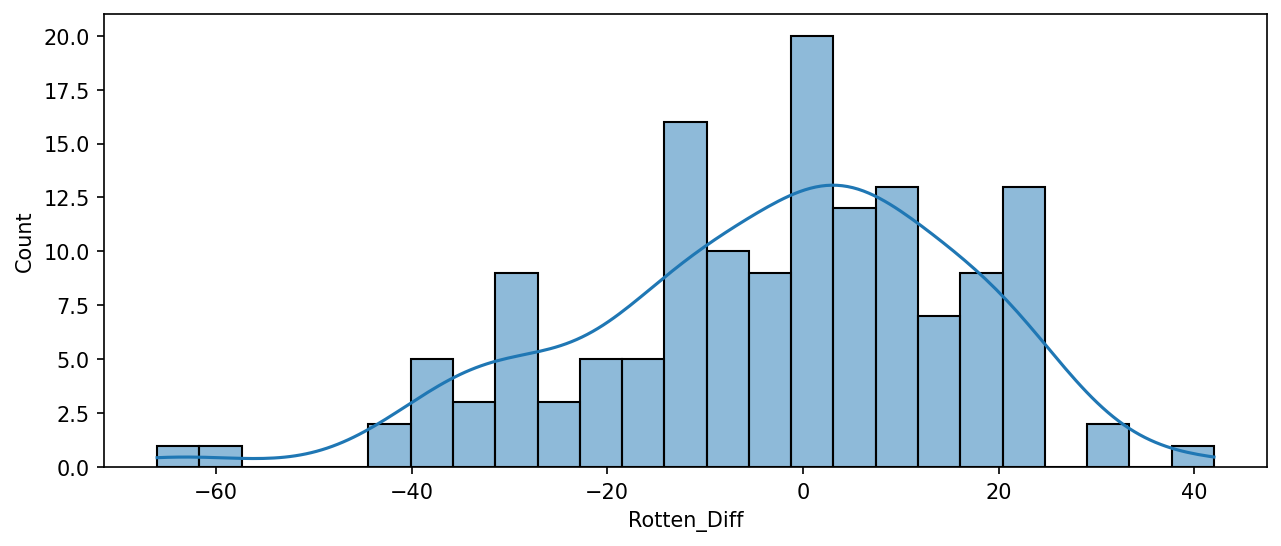

In [44]:
plt.figure(figsize=(10,4),dpi=150)
sns.histplot(data=all_sites,x="Rotten_Diff",bins=25,kde=True)

### Let's find out which movies are causing the largest differences.

#### The top 5 movies users rated higher than critics on average

In [34]:
# One way of doing it :

print("Users Love but Critics Hate")
all_sites.sort_values("Rotten_Diff",ascending=True).head(5)[["FILM","Rotten_Diff","Liked by"]]

# Another way :

# print("Users Love but Critics Hate")
# all_sites.nsmallest(5,"Rotten_Diff")[["FILM","Rotten_Diff","Liked by"]]

Users Love but Critics Hate


FILM  Rotten_Diff        Liked by
3       Do You Believe? (2015)          -66  Liked by Users
85           Little Boy (2015)          -61  Liked by Users
134    The Longest Ride (2015)          -42  Liked by Users
105    Hitman: Agent 47 (2015)          -42  Liked by Users
125  The Wedding Ringer (2015)          -39  Liked by Users

#### The top 5 movies critics rated higher than users on average

In [36]:
# One way of doing it :

# print("Critics love, but Users Hate")
# all_sites.sort_values("Rotten_Diff",ascending=False).head(5)[["FILM","Rotten_Diff","Liked by"]]

# Another way :

print("Critics Love but Users Hate")
all_sites.nlargest(5,"Rotten_Diff")[["FILM","Rotten_Diff","Liked by"]]

Users Love but Critics Hate


FILM  Rotten_Diff          Liked by
69                  Mr. Turner (2014)           42  Liked by Critics
112                 It Follows (2015)           31  Liked by Critics
115          While We're Young (2015)           31  Liked by Critics
37               Welcome to Me (2015)           24  Liked by Critics
40   I'll See You In My Dreams (2015)           24  Liked by Critics

## MetaCritic
Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

#### Scatterplot of the Metacritic Rating versus the Metacritic User rating.

plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x="Metacritic",y="Metacritic_User")
plt.xlim(0,100)
plt.ylim(0,10)

## IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.


#### Scatterplot showing the relationship between vote counts on MetaCritic versus vote counts on IMDB.

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

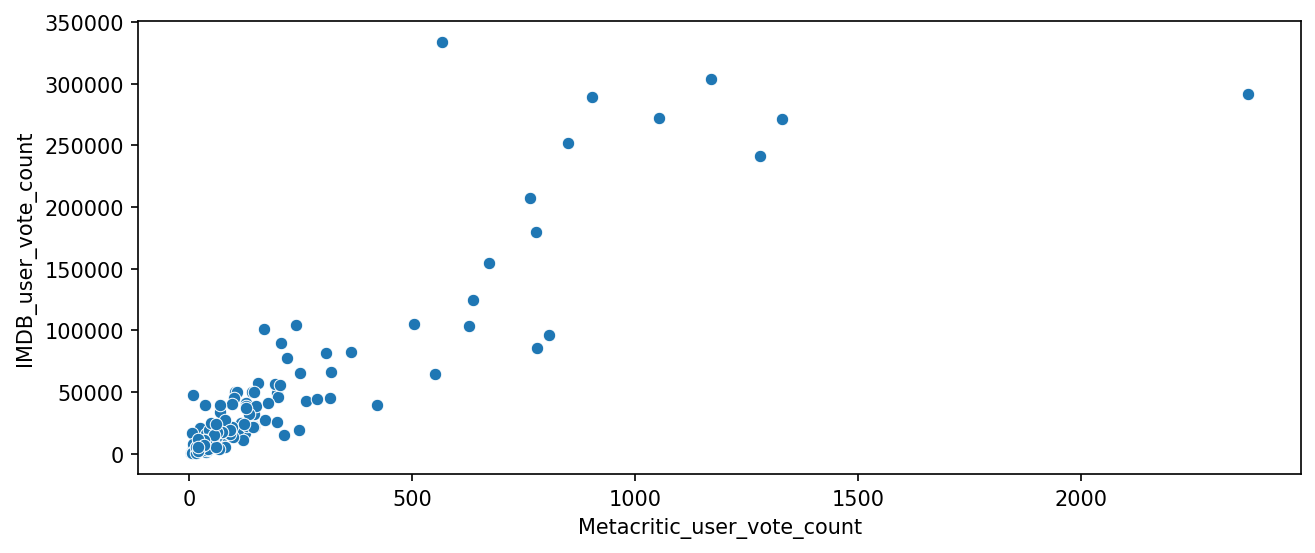

In [38]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x="Metacritic_user_vote_count",y="IMDB_user_vote_count")

#### The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?

In [39]:
all_sites.nlargest(1,"IMDB_user_vote_count")[["FILM","IMDB_user_vote_count"]]

FILM  IMDB_user_vote_count
14  The Imitation Game (2014)                334164

#### What movie has the highest Metacritic User Vote count?

In [40]:
all_sites.nlargest(1,"Metacritic_user_vote_count")[["FILM","Metacritic_user_vote_count"]]

FILM  Metacritic_user_vote_count
88  Mad Max: Fury Road (2015)                        2375

## Fandango Scores vs. All Sites
Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

**Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames, so with a *inner* merge we merge together both DataFrames based on the FILM columns.**

In [48]:
merged_data = pd.merge(fandango,all_sites,how="inner",on="FILM")
merged_data.head(3)

FILM  STARS  RATING  VOTES  RottenTomatoes  \
0  Fifty Shades of Grey (2015)    4.0     3.9  34846              25   
1        Jurassic World (2015)    4.5     4.5  34390              71   
2       American Sniper (2015)    5.0     4.8  34085              72   

   RottenTomatoes_User  Metacritic  Metacritic_User  IMDB  \
0                   42          46              3.2   4.2   
1                   81          59              7.0   7.3   
2                   85          72              6.6   7.4   

   Metacritic_user_vote_count  IMDB_user_vote_count  Rotten_Diff  \
0                         778                179506          -17   
1                        1281                241807          -10   
2                         850                251856          -13   

    Critics/Users        Liked by  
0  Liked by Users  Liked by Users  
1  Liked by Users  Liked by Users  
2  Liked by Users  Liked by Users

In [49]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   RottenTomatoes              145 non-null    int64  
 5   RottenTomatoes_User         145 non-null    int64  
 6   Metacritic                  145 non-null    int64  
 7   Metacritic_User             145 non-null    float64
 8   IMDB                        145 non-null    float64
 9   Metacritic_user_vote_count  145 non-null    int64  
 10  IMDB_user_vote_count        145 non-null    int64  
 11  Rotten_Diff                 145 non-null    int64  
 12  Critics/Users               145 non-null    object 
 13  Liked by                    145 non

### Normalizing columns to Fandango STARS and RATINGS 0-5 

RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.


In [51]:
# Used for rottentomatoes, rottentomatoes_user and metacritic

def normalize1(x):
    return np.round((x/20),1)

# Used for Metacritic_User,IMDB

def normalize2(x):
    return np.round((x/2),1)

#------------------------------------------------------------------------------------

merged_data["RT_NORM"] = merged_data["RottenTomatoes"].apply(normalize1)
merged_data["RTU_NORM"] = merged_data["RottenTomatoes_User"].apply(normalize1)
merged_data["META_NORM"] = merged_data["Metacritic"].apply(normalize1)

merged_data["METAU_NORM"] = merged_data["Metacritic_User"].apply(normalize2)
merged_data["IMDB_NORM"] = merged_data["IMDB"].apply(normalize2)

merged_data.head(5)

FILM  STARS  RATING  VOTES  RottenTomatoes  \
0  Fifty Shades of Grey (2015)    4.0     3.9  34846              25   
1        Jurassic World (2015)    4.5     4.5  34390              71   
2       American Sniper (2015)    5.0     4.8  34085              72   
3             Furious 7 (2015)    5.0     4.8  33538              81   
4            Inside Out (2015)    4.5     4.5  15749              98   

   RottenTomatoes_User  Metacritic  Metacritic_User  IMDB  \
0                   42          46              3.2   4.2   
1                   81          59              7.0   7.3   
2                   85          72              6.6   7.4   
3                   84          67              6.8   7.4   
4                   90          94              8.9   8.6   

   Metacritic_user_vote_count  IMDB_user_vote_count  Rotten_Diff  \
0                         778                179506          -17   
1                        1281                241807          -10   
2                         850                251856          -13   
3                         764                207211           -3   
4                         807                 96252            8   

      Critics/Users          Liked by  RT_NORM  RTU_NORM  META_NORM  \
0    Liked by Users    Liked by Users      1.2       2.1        2.3   
1    Liked by Users    Liked by Users      3.6       4.0        3.0   
2    Liked by Users    Liked by Users      3.6       4.2        3.6   
3    Liked by Users    Liked by Users      4.0       4.2        3.4   
4  Liked by Critics  Liked by Critics      4.9       4.5        4.7   

   METAU_NORM  IMDB_NORM  
0         1.6        2.1  
1         3.5        3.6  
2         3.3        3.7  
3         3.4        3.7  
4         4.4        4.3

### Creating a DataFrame that only contains the normalized ratings including both STARS and RATING from the original Fandango table.

In [53]:
norm_scores = merged_data[["STARS","RATING","RT_NORM","RTU_NORM","META_NORM","METAU_NORM","IMDB_NORM"]]
norm_scores.head()

STARS  RATING  RT_NORM  RTU_NORM  META_NORM  METAU_NORM  IMDB_NORM
0    4.0     3.9      1.2       2.1        2.3         1.6        2.1
1    4.5     4.5      3.6       4.0        3.0         3.5        3.6
2    5.0     4.8      3.6       4.2        3.6         3.3        3.7
3    5.0     4.8      4.0       4.2        3.4         3.4        3.7
4    4.5     4.5      4.9       4.5        4.7         4.4        4.3

### Comparing Distribution of Scores Across Sites

Now the moment of truth! ¿Does Fandango display abnormally high ratings?
¿Are the ratings themselves higher than average?

<AxesSubplot:ylabel='Density'>

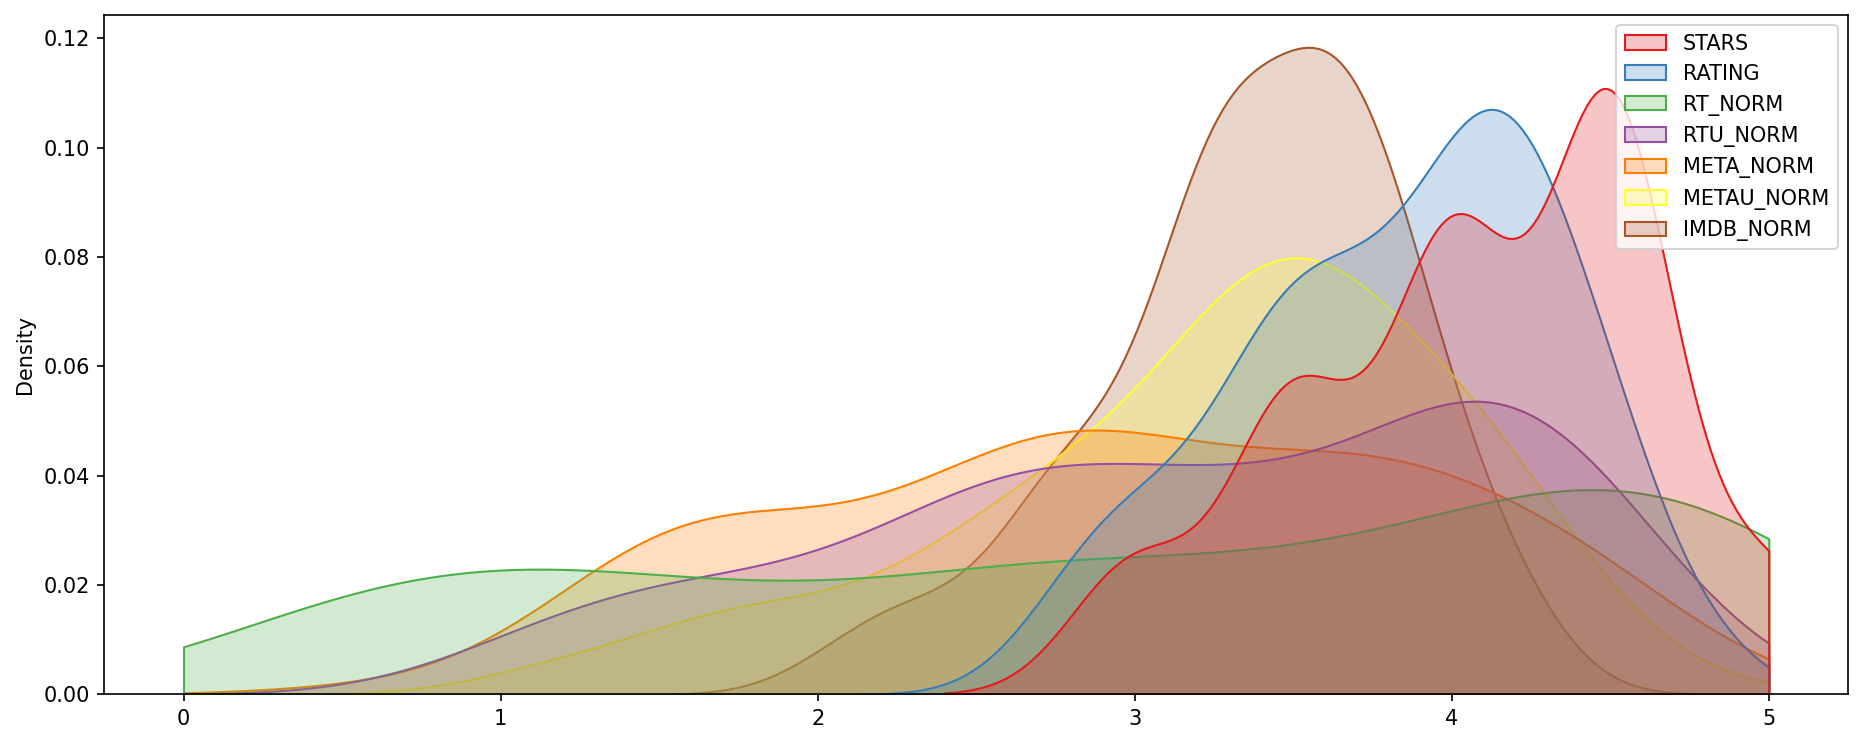

In [54]:
plt.figure(figsize=(15,6),dpi=150)

sns.kdeplot(data=norm_scores,
                    fill=True,
                    legend=True,
                    clip=[0,5],
                    shade=True,palette="Set1")

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.**

In [55]:
plt.figure(figsize=(15,6),dpi=150)

sns.kdeplot(data=norm_scores[["RT_NORM","STARS"]],
                    legend=True,
                    clip=[0,5],
                    shade=True,palette="Set1")

<AxesSubplot:ylabel='Density'>

### How are the worst movies rated across all platforms?

In [56]:
plt.figure(figsize=(16,5),dpi=150)
sns.clustermap(data=norm_scores,cmap="mako",col_cluster=False)

<Figure size 2400x750 with 0 Axes>

**Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies?**

In [61]:
# Adding FILM column again to see the results
norm_scores = merged_data[["FILM","STARS","RATING","RT_NORM","RTU_NORM","META_NORM","METAU_NORM","IMDB_NORM"]]

# One way of doing it

#norm_scores.sort_values("RT_NORM",ascending=True).head(10)

# Another way of doing it

top_10_worst = norm_scores.nsmallest(10,"RT_NORM")
top_10_worst


FILM  STARS  RATING  RT_NORM  RTU_NORM  \
49  Paul Blart: Mall Cop 2 (2015)    3.5     3.5      0.2       1.8   
25                 Taken 3 (2015)    4.5     4.1      0.4       2.3   
28          Fantastic Four (2015)    3.0     2.7      0.4       1.0   
54             Hot Pursuit (2015)    4.0     3.7      0.4       1.8   
84        Hitman: Agent 47 (2015)    4.0     3.9      0.4       2.4   
50       The Boy Next Door (2015)    4.0     3.6      0.5       1.8   
77             Seventh Son (2015)    3.5     3.2      0.6       1.8   
78               Mortdecai (2015)    3.5     3.2      0.6       1.5   
83              Sinister 2 (2015)    3.5     3.3      0.6       1.7   
87     Unfinished Business (2015)    3.5     3.2      0.6       1.4   

    META_NORM  METAU_NORM  IMDB_NORM  
49        0.6         1.2        2.2  
25        1.3         2.3        3.0  
28        1.4         1.2        2.0  
54        1.6         1.8        2.4  
84        1.4         1.6        3.0  
50        1.5         2.8        2.3  
77        1.5         2.0        2.8  
78        1.4         1.6        2.8  
83        1.6         2.5        2.8  
87        1.6         1.9        2.7

**Visualizing the distribution of ratings across all sites for the top 10 worst movies.**

<AxesSubplot:ylabel='Density'>

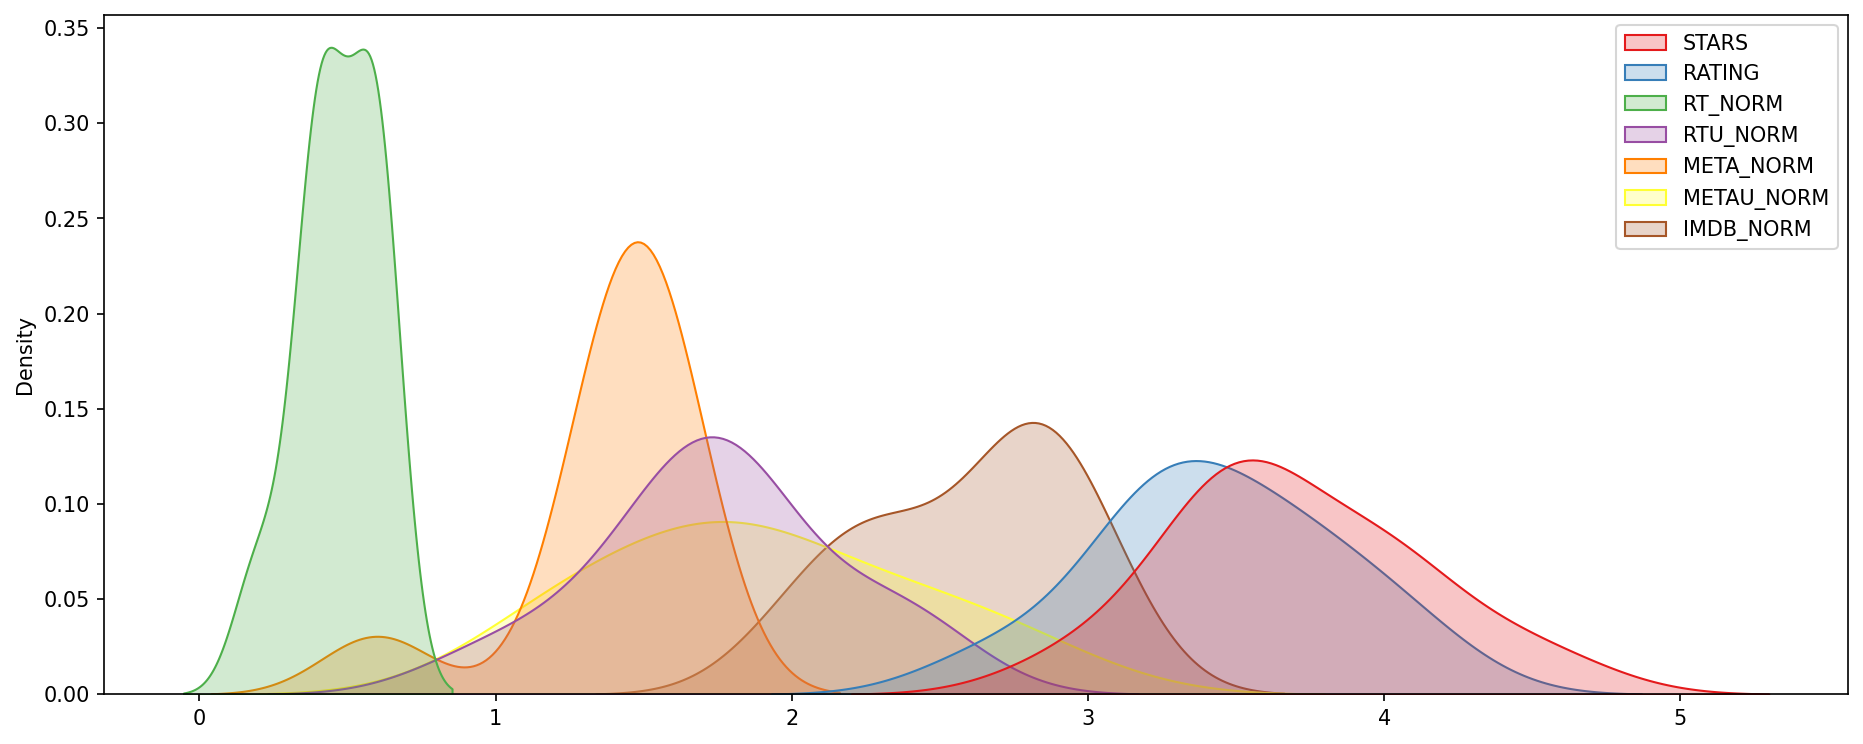

In [59]:
plt.figure(figsize=(15,6),dpi=150)
sns.kdeplot(data=top_10_worst,fill=True,palette="Set1")

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Final thoughts: Wow! Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!**

In [65]:
top_10_worst.loc[25]

FILM          Taken 3 (2015)
STARS                    4.5
RATING                   4.1
RT_NORM                  0.4
RTU_NORM                 2.3
META_NORM                1.3
METAU_NORM               2.3
IMDB_NORM                  3
Name: 25, dtype: object